In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [25]:
# make sine

time = np.linspace(0, 10, 2000)
amp = 1
omega = 3

x_t = amp*np.sin(omega*time)
y_t = np.zeros(time.shape)
noise_t = np.random.normal(0, 0.01, size=(len(time), ))
noise_x = np.random.normal(0, 0.05, size=(len(time), ))
noise_y = np.random.normal(0, 0.05, size=(len(time), ))

t_noise = time + noise_t
x_t_noise = x_t + noise_x
y_t_noise = y_t + noise_y

In [47]:
#Plot Stuff
def plot(x, y, time, title):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))
    
    ax1.scatter(time, x, s= 5, marker = "x")
    ax1.set_xlabel("x axis")
    ax1.set_ylabel("Amplitude")
    ax2.scatter(time, y, s = 5, marker = "+")
    ax2.set_xlabel("y axis")
    ax2.set_ylabel("Amplitude")
    fig.suptitle(title)
    plt.show()

In [65]:
def rotate(x, y, theta):
    noise_x = np.random.normal(0, 0.05, size=(len(time), ))
    noise_y = np.random.normal(0, 0.05, size=(len(time), ))
    
    noisy_x = x + noise_x
    noisy_y = y + noise_y
    
    rot_x = noisy_x*np.cos(theta) - noisy_y*np.sin(theta)
    rot_y = noisy_x*np.sin(theta) + noisy_y*np.cos(theta)
    
    return (rot_x, rot_y)

thetas = [np.pi/3, np.pi/4, np.pi]
cameras = {}
dataset = []
for i, theta in enumerate(thetas):
    cameras[f"cam{i}"] = rotate(x_t_noise, y_t_noise, theta)
    cx, cy = rotate(x_t_noise, y_t_noise, theta)
    dataset.append(cx)
    dataset.append(cy)
dataset = np.array(dataset)

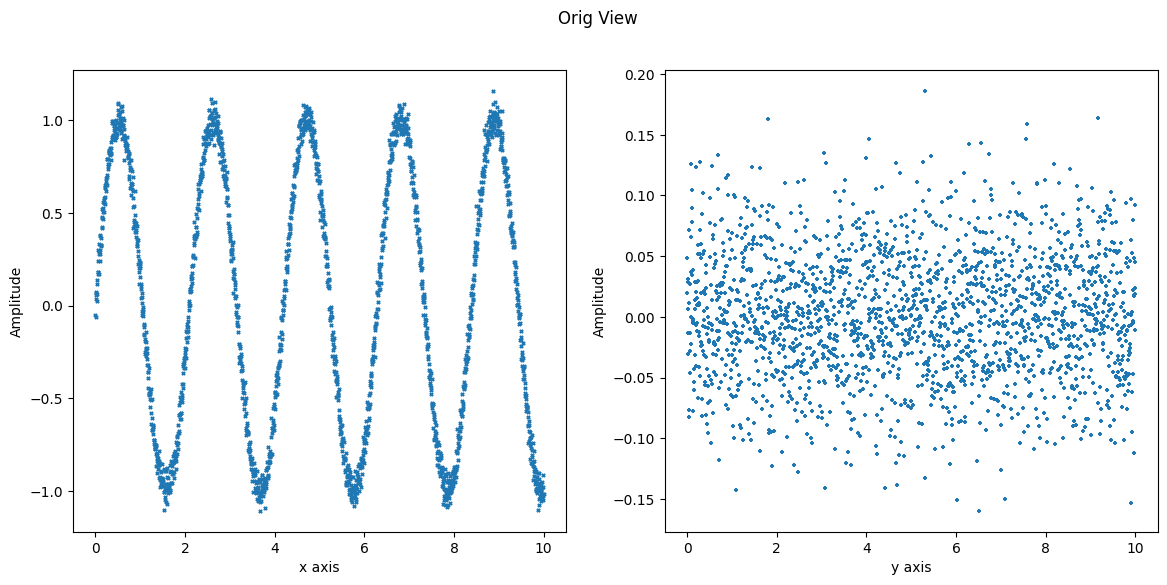

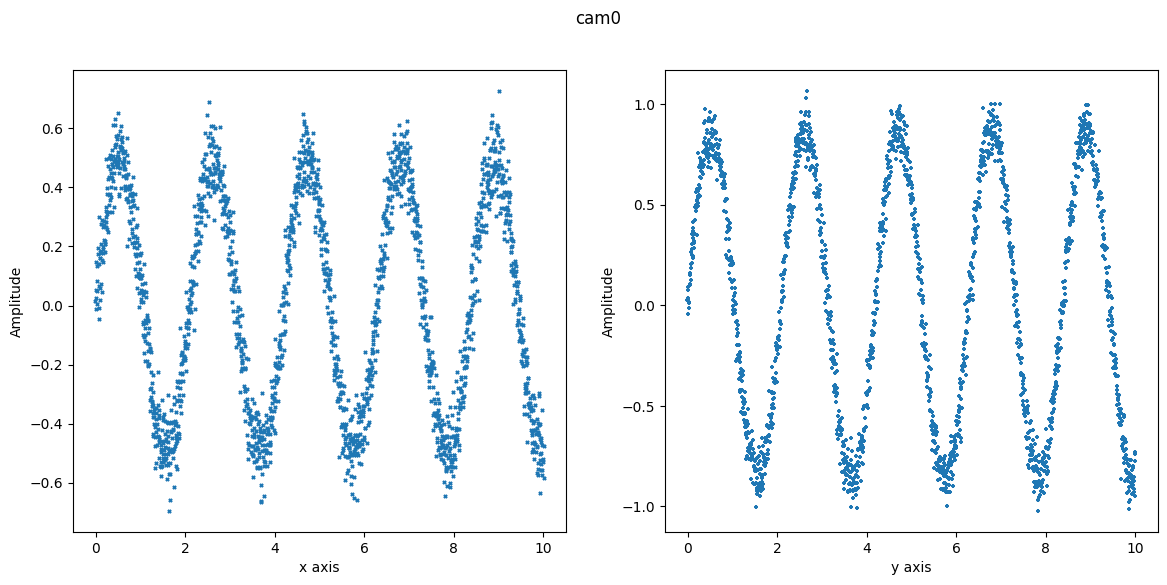

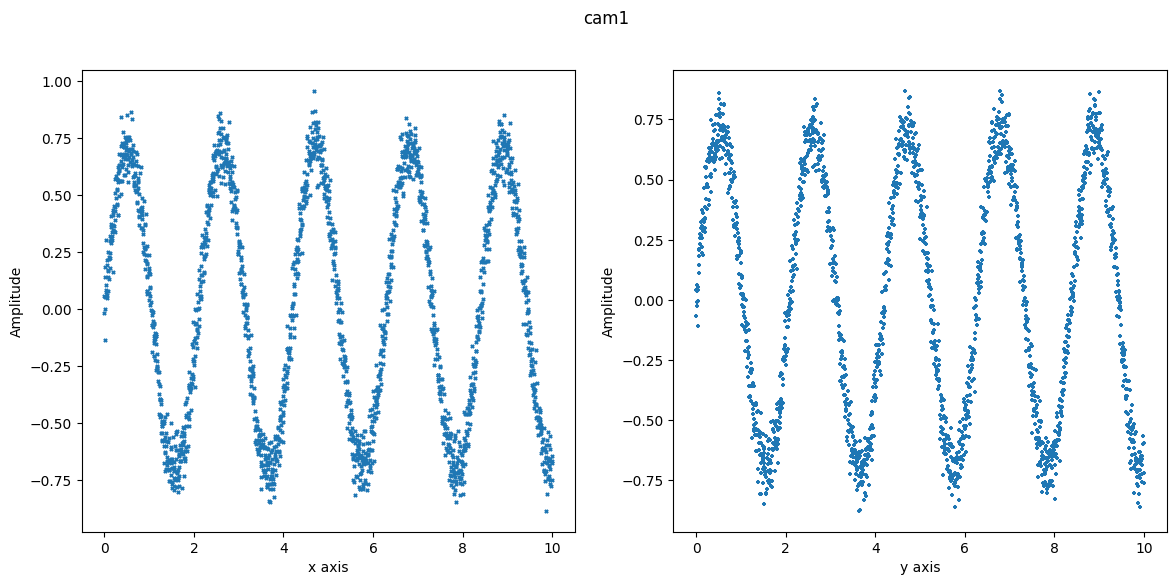

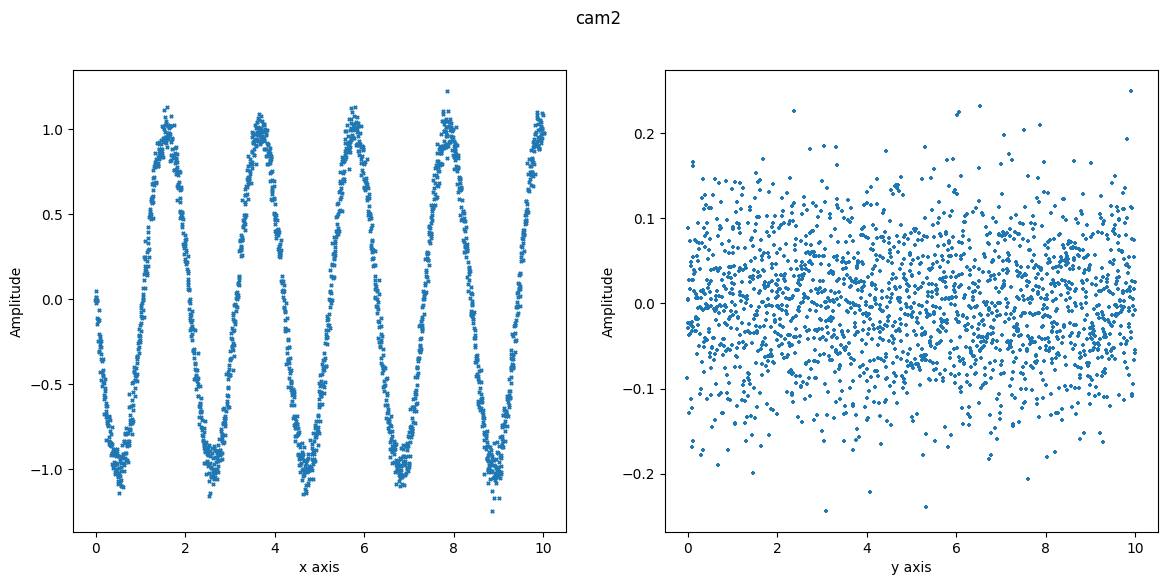

In [66]:
plot(x_t_noise, y_t_noise, time, "Orig View")

# Plot cameras
for i, theta in enumerate(thetas):
    plot(cameras[f"cam{i}"][0], cameras[f"cam{i}"][1], t_noise, f"cam{i}")


In [67]:
cov_matrix = np.cov(dataset)

eigval, eigvec = np.linalg.eigh(cov_matrix)

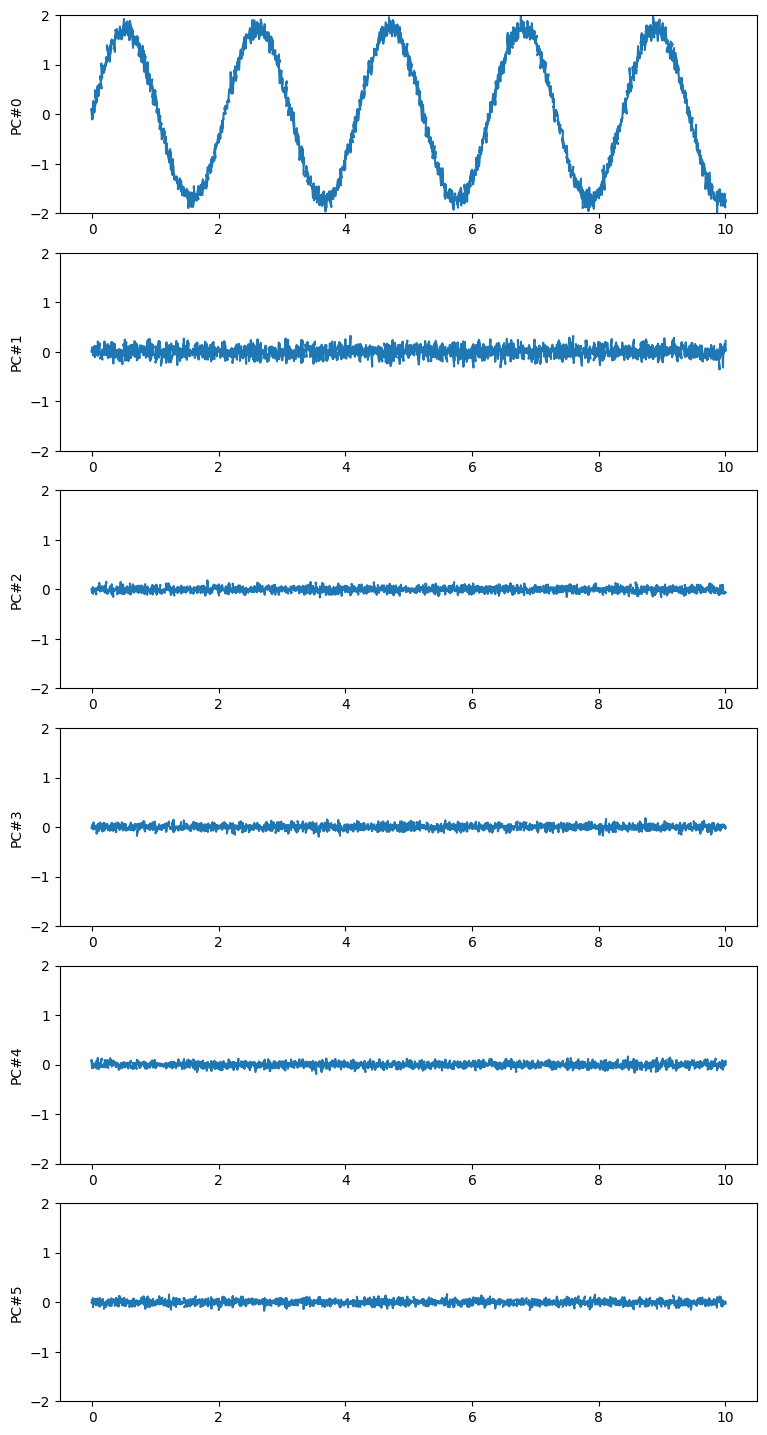

In [71]:
eigval = eigval[::-1]
signals = eigvec.T @ dataset
signals = signals[::-1]

fig, axs = plt.subplots(6, 1, figsize=(9, 18))

for idx, ax in enumerate(axs):
    ax.plot(t_noise, signals[idx])
    ax.set_ylabel(f"PC#{idx}")
    ax.set_ylim(-2, 2)
    

### Practical

(400, 112, 92)
(400, 10304)


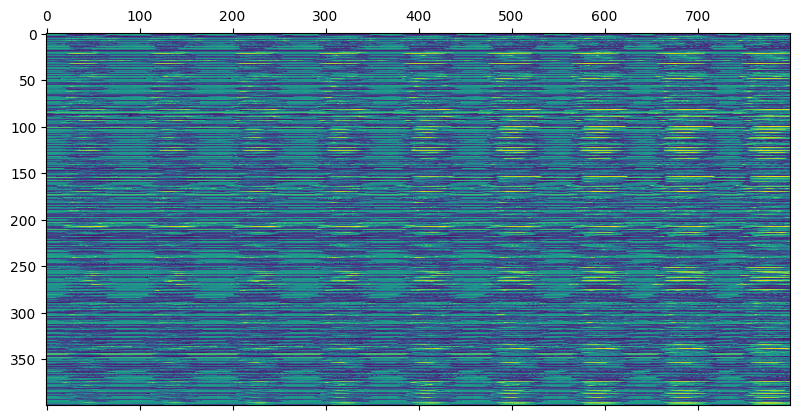

In [77]:
the_faces = np.load("att-faces-400.npz")["dataset"]

print(the_faces.shape)

dataset_tab = np.stack([i.flatten() for i in the_faces], axis=0)
plt.matshow(dataset_tab[:, :800])
print(dataset_tab.shape)

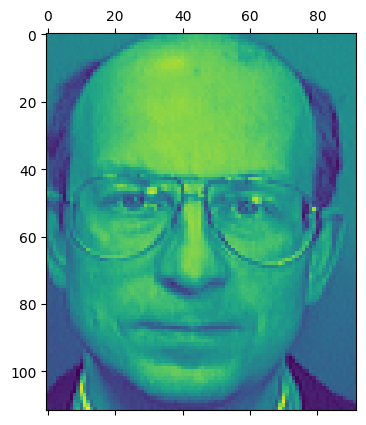

In [88]:
face = plt.matshow(dataset_tab[123].reshape(112, 92))

In [105]:
# from sklearn import decomposition
# print(dataset_tab.shape)
# pca = decomposition.PCA(n_components=6).fit(dataset_tab)

# reproj = pca.transform(dataset_tab)

# # > the pca.components_ gives me the PCs themselves
# print("components: ", pca.components_.shape)

# # > the reproj gives me the weights needed to reconstruct
# # the original data as a linear combination of the PCs 
# print("weights: ", reproj.shape)

# print(pca.explained_variance_ratio_)
# fig, axs = plt.subplots(6, 1, figsize=(9, 18))

# for index, pc in enumerate(pca.components_):
#     axs[index].plot(pc)

In [96]:
cov_matrix = np.cov(dataset_tab)

eigval, eigvec = np.linalg.eigh(cov_matrix)

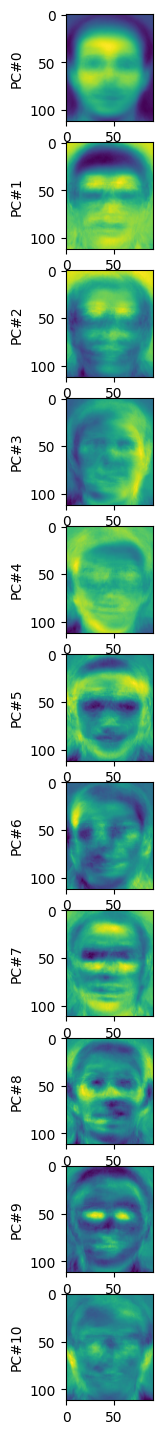

In [159]:
eigval = eigval[::-1]
signals = eigvec.T @ dataset_tab
signals = signals[::-1]

fig, axs = plt.subplots(11, 1, figsize=(9, 18))

for idx, ax in enumerate(axs):
    ax.imshow(signals[idx].reshape(112, 92))
    ax.set_ylabel(f"PC#{idx}")

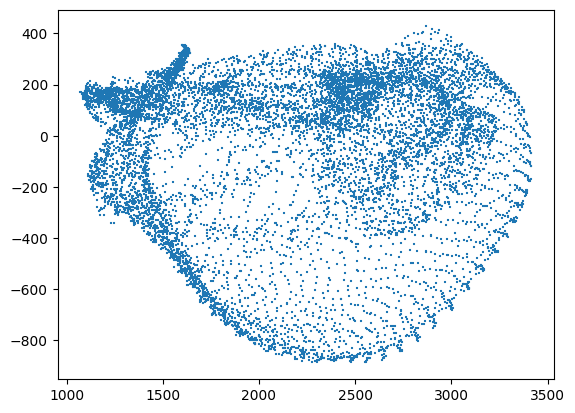

In [203]:
plt.scatter(signals[0], signals[1], marker = "+", s = 1)


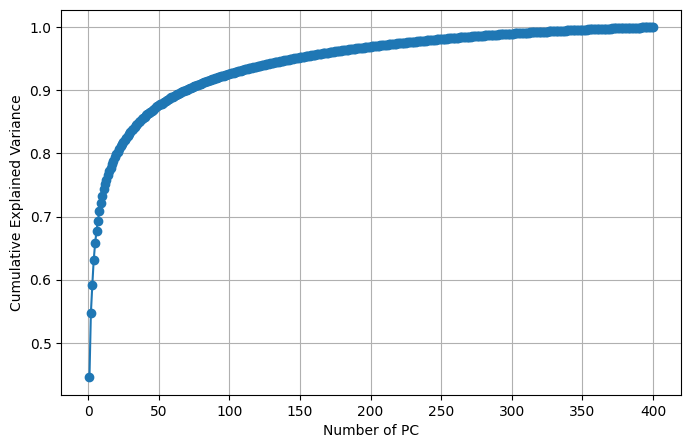

In [205]:
import numpy as np
import matplotlib.pyplot as plt

eigval = eigval[::-1]
explained_variance = eigval / np.sum(eigval)  
cumulative_explained_variance = np.cumsum(explained_variance) 

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='-')
plt.xlabel("Number of PC")
plt.ylabel("Cumulative Explained Variance")
# plt.title("Number of PC")
plt.grid()
plt.show()


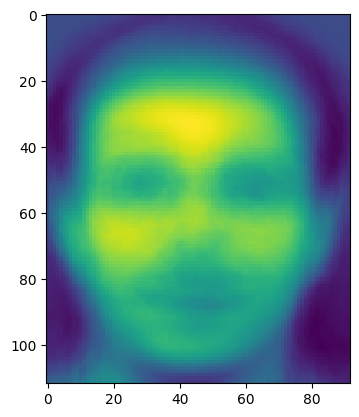

In [184]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure signals and eigvec are defined before this
reconst_idx = 1
reconst_weights = eigvec[reconst_idx, :][::-1]
x = np.zeros_like(signals[0])
for idx in range(1):
    x = x + signals[idx] * reconst_weights[idx]
    plt.imshow(x.reshape(112, 92))  
plt.show()


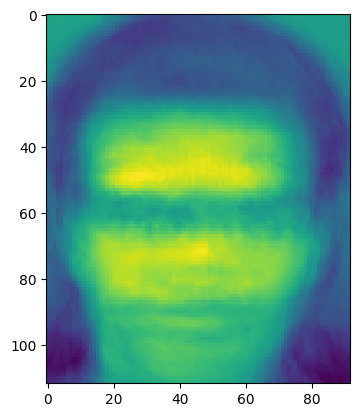

In [185]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure signals and eigvec are defined before this
reconst_idx = 1
reconst_weights = eigvec[reconst_idx, :][::-1]
x = np.zeros_like(signals[0])
for idx in range(10):
    x = x + signals[idx] * reconst_weights[idx]
    plt.imshow(x.reshape(112, 92))  
plt.show()


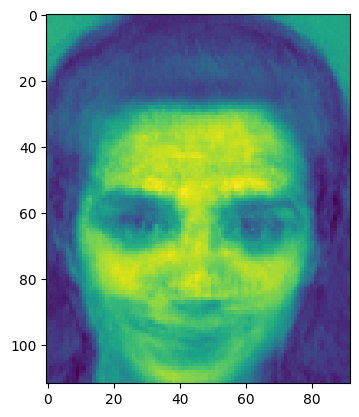

In [186]:
import numpy as np
import matplotlib.pyplot as plt

# Ensure signals and eigvec are defined before this
reconst_idx = 1
reconst_weights = eigvec[reconst_idx, :][::-1]
x = np.zeros_like(signals[0])
for idx in range(100):
    x = x + signals[idx] * reconst_weights[idx]
    plt.imshow(x.reshape(112, 92))  
plt.show()
